In [7]:
# [ImageDataGenerator]의 데이터 생성을 위한 동작 확인
# - 이미지 전처리 작업, 데이터 증가시에 사용할 수 있음.
# - 데이터 증가 방법

# 라이브러리
import matplotlib.pylab as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = load_img('./data/bird.jpg')
data = img_to_array(img)

In [2]:
data        # array
data.shape  # (703, 454, 3)

(703, 454, 3)

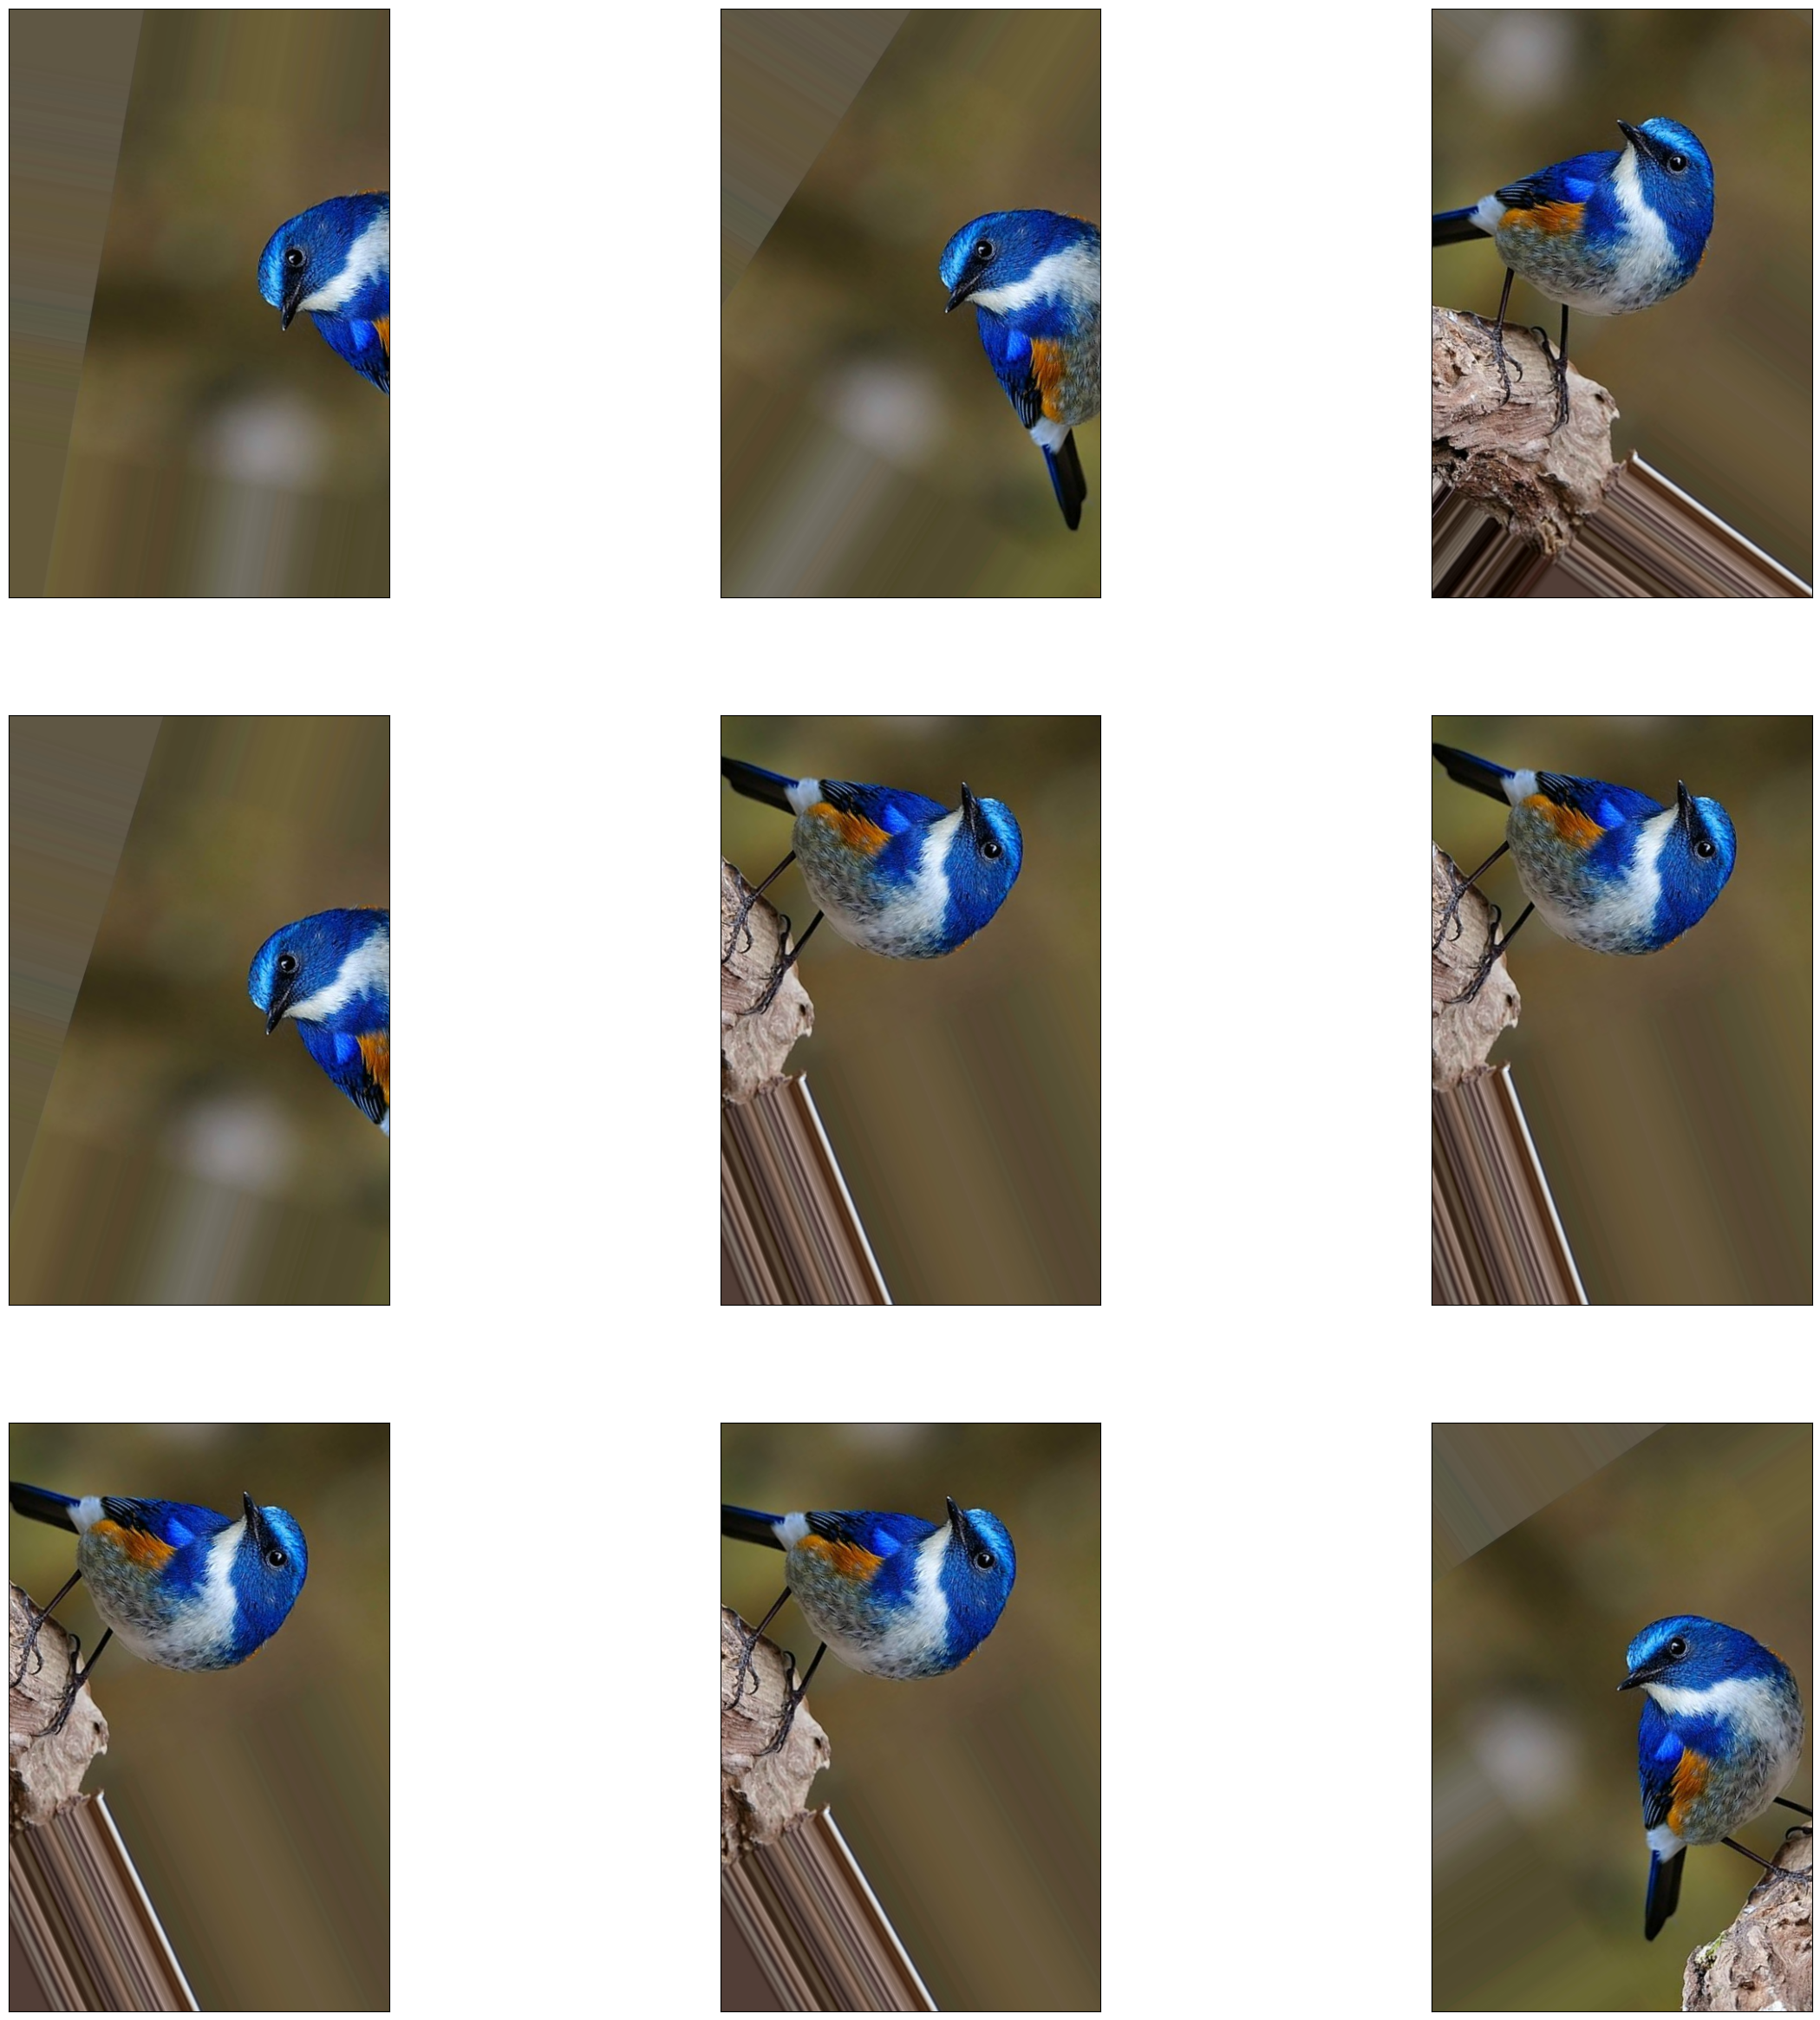

In [33]:
# width_shift_range 이용한 이미지 증가
img_data = expand_dims(data, 0) # 차원을 늘림
img_data.shape                  # (1, 703, 454, 3)
# ImageDataGenerator 객체 생성
# data_gen = ImageDataGenerator(width_shift_range=[-200,200]) # 이미지 상하 이동
# data_gen = ImageDataGenerator(height_shift_range=0.5) # 이미지 좌우 이동
# data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) # 좌우 반전과, 이미지 뒤집히는 결과
data_gen = ImageDataGenerator(rotation_range=90) # - 90 ~ 90도 값에서 랜덤값으로 돌아감
# data_gen = ImageDataGenerator(brightness_range=[0.3, 1.2]) # 밝기조절
# data_gen = ImageDataGenerator(zoom_range=[0.4, 1.5]) # 이미지 일부 확대
data_iter = data_gen.flow(img_data, batch_size=1)
fig = plt.figure(figsize=(30,30))
# 반복문을 이용해서 데이터를 표시 화면에 표시
for i in range(9):
    plt.subplot(3,3, i+1)
    batch = next(data_iter)
    image = batch[0].astype('uint16')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
plt.show()    


In [39]:
# 설명할 수 있는 CNN(합성곱 네트워크(신경망))
# 특성 맵을 통한 시각화

# 1. keras 설치
# %pip install keras
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ------------- -------------------------- 13.1/39.5 MB 68.7 MB/s eta 0:00:01
   --------------------------------- ------ 33.6/39.5 MB 85.1 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 66.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
# 라이브러리
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [54]:
# CNN 모델 생성
model = Sequential([
    tf.keras.layers.Input((100, 100, 3)),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,922 (1.15 MB)

 Trainable params: 301,922 (1.15 MB)

 Non-trainable params: 0 (0.00 B)